# Spectrophotometry Analysis Automation
## Progress Report #1
#### Name: Rachel Veenstra
#### Date: March 19, 2019

---
## Objective

Python function for organizing/analyzing data from absorbance analysis of ureides and nitrates to improve KSU Crops lab efficiency.

---
## Background and Rationale

- RAU = Relative Abundance of Ureides (%)
- Ureide/nitrate tests are run to identify/quantify possible symbiotic fixation of nitrogen by rhizobia in the rhizosophere of soybeans. 
- Excel sheets are generated when samples are run with the spectrophotometer. (ID # and absorbance)
- Values must be manipulated into the correct formula-embedded Excel sheet cells to create curves and extrapolate concentration values.
- A code with this function would be beneficial to streamline the process and automate lab analysis procedures.

---
## Outcomes Accomplished:

### 1) Import .csv files from the KSU Crops dropbox.


- Path for accessing files in dropbox is user-dependent
- Files imported with Pandas

In [4]:
import glob
import pandas as pd

user_name = "rveenstra"

data_file_n = '/Users/' + user_name + '/Dropbox/CropProdLabKSU/Lab Analysis/VISIONlite Results/Nitrates'

glob.os.chdir(data_file_n) # changing working directory

nit_df = pd.read_csv('LIF Ashland Nit 12-13-18.csv') # importing Nitrate Dataset

data_file_u = '/Users/' + user_name + '/Dropbox/CropProdLabKSU/Lab Analysis/VISIONlite Results/Ureides'

glob.os.chdir(data_file_u) # changing working directory

ur_df = pd.read_csv('LIF Ashland 11-15-18.csv') # Importing Ureide Dataset

In [5]:
# Displaying sample of imported pandas dataset
nit_df[0:20]

,Sample Name,410 nm [A]
0,1_1,0.004
1,1_2,0.003
2,2_1,0.001
3,2_2,0.003
4,0.00,0.006
5,0.00,0.006
6,0.00,0.006
7,1500.0,0.166
8,1500.0,0.171
9,1500.0,0.166


### 2) Recognize that there are two repetitions for each sample. Calculate the mean and variance of values.

- Group samples based on ID#

In [6]:
# renaming columns for ease of manipulation
nit_df.rename(columns = {'Sample Name':'ID', '410 nm   [A]':'B'}, inplace=True)

# grouping rows by ID values
nit_g = nit_df.groupby('ID')
print(nit_g)

# showing number of rows with a given ID value
nit_g.count()

,B
ID,
0.00,3
1500.0,3
1_1,1
1_2,1
2_1,1
2_2,1
3000.0,3
4500.0,3
LIF-241,2


- Calculate the mean of repeated samples and merge into dataframe
- Calculate the variance between samples.
- Create an if statement to display "Error" if > .10

In [18]:
# Creating a column for grouped mean absorbance and merging with original dataframe
nit_final=nit_df.merge(nit_g.mean(),on='ID')

# Calculation of the variance between the given absorbance readings, based on ID
nit_final2=nit_final.merge(abs(nit_g.max()-nit_g.min())/nit_g.max(), on='ID')

# Renaming columns for ease of manipulation
nit_final2.rename(columns = {'B':'Var', 'B_x':'Abs', 'B_y':'Mean'}, inplace=True)

# Displaying a sample of final dataset
nit_final2[16:22]

,ID,Abs,Mean,Var
16,LIF-241,1.181,1.1870,0.010059
17,LIF-241,1.193,1.1870,0.010059
18,LIF-242,1.101,1.1220,0.036745
19,LIF-242,1.143,1.1220,0.036745
20,LIF-243,1.414,1.3905,0.033239
21,LIF-243,1.367,1.3905,0.033239


---
## Outcomes to be Addressed:

### 1) Within the file, identify what is a standard and what is a sample.

- Location/number of standards may not always be constant.

### 2) Generate a curve based on the intersection of the concentration and absorbance values of the standards.

Nitrate Calibration Curve


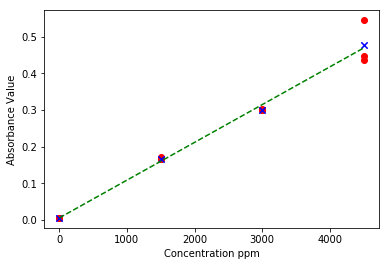

absorbance = 0.000103(concentration) + 0.005967
concentration = (absorbance - 0.005967) / 0.000103


In [21]:
import numpy
import matplotlib.pylab as plt
import scipy
import pylab

nit_df.rename(columns = {'Sample Name':'ID', '410 nm   [A]':'B'}, inplace=True)

nit_g = nit_df.groupby('ID')

nit_final=nit_df.merge(nit_g.mean(),on='ID')
nit_final2=nit_final.merge(abs(nit_g.max()-nit_g.min())/nit_g.max(), on='ID')
nit_final2.rename(columns = {'B':'Var', 'B_x':'Abs', 'B_y':'Mean'}, inplace=True)

c = (0,0,0,1500,1500,1500,3000,3000,3000,4500,4500,4500)
a = nit_final2.iloc[4:16, 1]
m = nit_final2.iloc[4:16, 2]

pylab.plot(c, a, "ro")
pylab.plot(c, m,'bx')
pylab.ylabel("Absorbance Value")
pylab.xlabel("Concentration ppm")

z = numpy.polyfit(c, m, 1, rcond=None, full=False, w=None, cov=False)
p = numpy.poly1d(z)
pylab.plot(c, p(c),"g--")
print("Nitrate Calibration Curve")
pylab.show()
print("absorbance = %.6f(concentration) + %.6f"%(z[0],z[1]))
print("concentration = (absorbance - %.6f) / %.6f"%(z[1],z[0]))

### 3) Plot absorbance means of each sample on the curve to yield final concentration values, throwing an error message for samples with unacceptable variance values.


### 4) Export these values (after running separately for ureides and nitrates) to a single file and match based on ID# to find RAU value.